In [1]:
import os
import pandas as pd

In [3]:
df = pd.read_csv('driver_imgs_list(main).csv')

<Axes: xlabel='subject'>

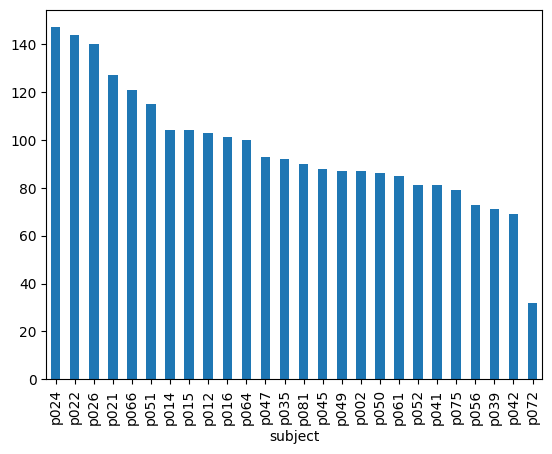

In [4]:
df['subject'].sort_values(ascending=True).value_counts().plot(kind='bar')

In [5]:
imgs_set = df[df['subject']=='p072']

In [6]:
import matplotlib.pyplot as plt

In [7]:
from PIL import Image

In [8]:
imgs_set

,Unnamed: 0,subject,classname_x,img
2299,2299,p072,c0,img_13121.jpg
2300,2300,p072,c0,img_1053.jpg
2301,2301,p072,c0,img_90764.jpg
2302,2302,p072,c0,img_1215.jpg
2303,2303,p072,c1,img_80042.jpg
2304,2304,p072,c1,img_18635.jpg
2305,2305,p072,c1,img_14184.jpg
2306,2306,p072,c1,img_36758.jpg
2307,2307,p072,c1,img_38125.jpg
2308,2308,p072,c1,img_6915.jpg


In [74]:
range(10)

range(0, 10)

In [10]:
labels = {'classname':['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'],'labels': ['safe driving','texting - right', 'talking on the phone - right','texting - left','talking on the phone - left', 'operating the radio','drinking',
'reaching behind',
 'hair and makeup',
'talking to passenger']}
labels_df = pd.DataFrame(labels)

In [11]:
labels_df

,classname,labels
0,c0,safe driving
1,c1,texting - right
2,c2,talking on the phone - right
3,c3,texting - left
4,c4,talking on the phone - left
5,c5,operating the radio
6,c6,drinking
7,c7,reaching behind
8,c8,hair and makeup
9,c9,talking to passenger


In [13]:
import shutil
import random

In [14]:
source = 'imgs/train/'
destination = 'images/train/'
num = 250
random.seed(42)

In [94]:
for folder_name in os.listdir(source):
    folder_path = os.path.join(source,folder_name)
    
    if os.path.isdir(folder_path):
        dest_folder_path = os.path.join(destination,folder_name)
        os.makedirs(dest_folder_path,exist_ok=True)

        img_files = [f for f in os.listdir(folder_path)]

        random.shuffle(img_files)

        selected_images = img_files[:num]

        for image in selected_images:
            source_path = os.path.join(folder_path,image)
            dest_path = os.path.join(dest_folder_path,image)
            shutil.copy2(source_path, dest_path)


In [18]:
df.drop(['Unnamed: 0'],axis=1)

,subject,classname_x,img
0,p002,c0,img_69092.jpg
1,p002,c0,img_92629.jpg
2,p002,c0,img_3370.jpg
3,p002,c0,img_35779.jpg
4,p002,c0,img_10012.jpg
...,...,...,...
2495,p081,c9,img_20671.jpg
2496,p081,c9,img_49316.jpg
2497,p081,c9,img_4162.jpg
2498,p081,c9,img_23818.jpg


<Axes: ylabel='subject'>

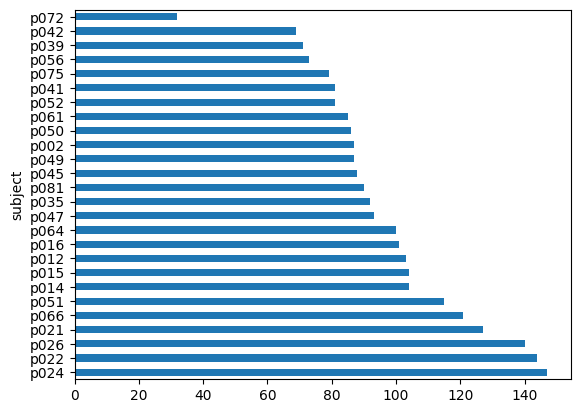

In [21]:
df['subject'].value_counts().plot(kind='barh')

In [97]:
import glob

In [111]:
images = []
for i in range(250*8):
    dir = 'images/train/c'
    ext= '/*.jpg'
    image = glob.glob(dir+str(i)+ext)
    images.append(image)


In [117]:
import os
import glob

# Source directory containing 9 folders
source_directory = 'images/train/'

# Function to list all image files in a directory with a specific extension
def list_images(directory, extension='jpg'):
    pattern = os.path.join(directory, f"*.{extension}")
    image_files = glob.glob(pattern)
    return image_files
images1 = []
# Iterate through the 9 folders
for folder_name in os.listdir(source_directory):
    folder_path = os.path.join(source_directory, folder_name)

    # Ensure it is a directory
    if os.path.isdir(folder_path):

        # Get a list of image files in the folder with *.jpg extension
        image_files = list_images(folder_path, extension='jpg')

        # Print the list of image files
        for image in image_files:
            images1.append(image)

        print("\n")  # Add a newline between folders for better readability


In [118]:
len(images1)

2500

In [144]:
images1[1].split("\\")[1]

'img_100074.jpg'

In [129]:
classname = []
for i in range(len(images1)):
    classname.append(images1[i][13:15])

In [145]:
images = []
for i in range(len(images1)):
    images.append(images1[i].split("\\")[1])

In [152]:
dic = {"classname":classname,"img":images}

In [153]:
df2 = pd.DataFrame(dic)

In [155]:
merge_df = pd.merge(df,df2, on='img', how='inner')

<Axes: xlabel='subject'>

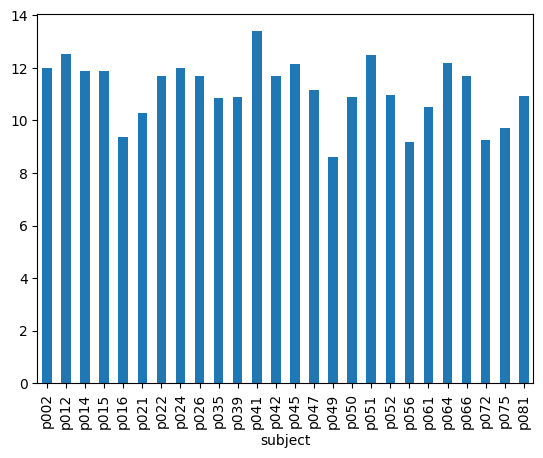

In [164]:
round((merge_df['subject'].value_counts()/df['subject'].value_counts()) *100,2).plot(kind='bar')

In [167]:
merge_df.drop(['classname_y'],axis=1,inplace=True)

In [169]:
merge_df.to_csv('driver_imgs_list(main).csv')

In [22]:
df

,Unnamed: 0,subject,classname_x,img
0,0,p002,c0,img_69092.jpg
1,1,p002,c0,img_92629.jpg
2,2,p002,c0,img_3370.jpg
3,3,p002,c0,img_35779.jpg
4,4,p002,c0,img_10012.jpg
...,...,...,...,...
2495,2495,p081,c9,img_20671.jpg
2496,2496,p081,c9,img_49316.jpg
2497,2497,p081,c9,img_4162.jpg
2498,2498,p081,c9,img_23818.jpg


In [29]:
labels_df['classname_x'] = labels_df['classname']

In [31]:
labels_df.drop(['classname'],axis=1,inplace=True)

In [25]:
df.drop(['Unnamed: 0'],axis=1,inplace=True )

In [33]:
merge_dataframe = pd.merge(df,labels_df,on='classname_x',how='inner')

In [35]:
merge_dataframe.to_csv('driver_images_list.csv')